# Bubble plots indicating ROC-AUC and direction of gene expression based on composite score

In [2]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/Users/sinha7290/public_html/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
    


In [3]:
import bone
reload(bone)
class MacAnalysis(bone.MacAnalysis):

    def __init__(self):
        bone.MacAnalysis.__init__(self)
#class MacAnalysis(bone.MacAnalysis):


#    def __init__(self):
#        self.db = hu.Database("/Users/sinha7290/public_html/Hegemon/explore.conf")
#        self.normal = []
#        self.uc = []
#        self.cd = []
#        self.ibd = []
#        self.st1 = []
#        self.st2 = []
#        self.st3 = []
#        self.otype = 0
#        self.axes = []
        
#    def addAxes(self, ax):
#        self.axes += [ax]

    def getMitchell2013(self, tn=1):
        self.prepareData("MACV104", "explore.conf")
        time = self.h.getSurvName("c timepoint")
        atype = [re.sub("h.*", "", str(k)) for k in time]
        ahash = {'0':0, '18':3, '12':2, '6':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c infection code")
        atypes = ['C', 'I']
        ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'dORF6':1, 'H1N1':1, 'mock':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = self.h.getSurvName("c infection code")
            ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        if (tn == 3):
            atype = self.h.getSurvName("c infection code")
            ahash = {'H1N1':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getJones2019(self, tn=1):
        self.prepareData("MACV107", "explore.conf")
        atype = self.h.getSurvName("c visit")
        ahash = {'AV':0, 'CV':1}
        gval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c src1")
        ahash = {'NMS':0, 'PBMC':1}
        rval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c virus positive at av (1=yes, 0=no, 9=not measured)")
        atypes = ['0', '1']
        ahash = {}
        if (tn == 2):
            atype = self.h.getSurvName("c human coronavirus at av (1=yes, 0=no, 9=not measured)")
            atype = [atype[i] if rval[i] == 0 and gval[i] == 0
                    else None for i in range(len(atype))]
        if (tn >= 3):
            atype = self.h.getSurvName("c visit")
            ahash = {'AV':1, 'CV':0}
            atypes = ['CV', 'AV']
        if (tn == 4):
            atype = [atype[i] if rval[i] == 0
                    else None for i in range(len(atype))]
        if (tn == 5):
            atype = [atype[i] if rval[i] == 1
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getTang2019(self, tn=1):
        self.prepareData("COV167")
        sex = self.h.getSurvName("c Sex")
        ahash = {'f':0, 'm':1}
        sex = [ahash[i] if i in ahash else None for i in sex]
        age = self.h.getSurvName("c age")
        age = [int(age[i]) if i > 1 and age[i] != 'NA'
                else None for i in range(len(age))]
        atype = self.h.getSurvName("c severity")
        atypes = ['C', 'M', 'S']
        ahash = {'flu_mod':1, 'flu_svre':2, 'hlty_ctrl':0}
        if (tn == 2):
            atypes = ['M', 'S']
            ahash = {'flu_mod':0, 'flu_svre':1}
        if (tn == 3):
            atype = [atype[i] if age[i] > 50
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getJaitovich2020(self, tn=1, tb=0):
        self.prepareDataDf("COV274")
        atype = self.getSurvName('c disease state')
        atypes = ['C', 'CoV']
        ahash = {'COVID-19':1, 'non-COVID-19':0}
        self.initData(atype, atypes, ahash)
        
    def getGow2009(self, tn=1, tb=0):
        self.prepareData("SS2", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['C', 'CFS']
        ahash = {'PBMC, control':0, 'PBMC, CFS':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getByrnes2009(self, tn=1, tb=0):
        self.prepareData("SS3", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c title')
        atypes = ['C_M', 'CFS_M']
        ahash = {'PBLs_pair 227565_unaffected':0,'PBLs_pair 236175_unaffected':0,'PBLs_pair 239142_unaffected':0,'PBLs_pair 247956_unaffected':0, 'PBLs_pair 3384_unaffected':0, 'PBLs_pair 3384_CFS':1,'PBLs_pair 247956_CFS':1,'PBLs_pair 239142_CFS':1,'PBLs_pair 236175_CFS':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getSabath2021(self, tn=1, tb=0):
        self.prepareData("SS1", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c group (ch1)')
        atypes = ['NH', 'H']
        ahash = {'not hospitalized':0, 'hospitalized':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getOvanda2021(self, tn=1, tb=0):
        self.prepareData("SS4", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c disease status (ch1)')
        atypes = ['Severe asthma', 'healthy']
        ahash = {'Severe asthma':0, 'healthy':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getSeverino2014(self, tn=1, tb=0):
        self.prepareData("SS5", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['healthy control','septic patient_survivor', 'septic patient_non-survivor']
        ahash = {'healthy control':0,'septic patient_survivor':1, 'septic patient_non-survivor':2}
        self.initData(atype, atypes, ahash)
        return
    
    def getVan20211(self, tn=1, tb=0):
        self.prepareData("SS7", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c condition (ch1)')
        atypes = ['Healthy Control','GWI']
        ahash = {'Healthy Control':0,'GWI':1}
        self.initData(atype, atypes, ahash)
        return
       
    def getBhatta2001(self, tn=1, tb=0):
        self.prepareData("LU5", "/booleanfs2/sahoo/Hegemon/explore.conf")
        atype = self.h.getSurvName('c sample2')
        atypes = ['Normal Lung','Carcinoids']
        ahash = {'Normal Lung':0,'Carcinoids':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getrobles2015(self, tn=1, tb=0):
        self.prepareData("LU11", "/booleanfs2/sahoo/Hegemon/explore.conf")
        atype = self.h.getSurvName('c src1')
        atypes = ['lung, nontumor adjacent', 'lung, adenocarcinoma']
        ahash = {'lung, nontumor adjacent':0,'lung, adenocarcinoma':1}
        self.initData(atype, atypes, ahash)
        return
        
    def getreichmann2021(self, tn=1, tb=0):
        self.prepareData("SS9", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c condition (ch1)')
        atypes = ['Control', 'Mtb']
        ahash = {'Control':0,'Mtb':1}
        self.initData(atype, atypes, ahash)
        return

        
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig


def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

# Fig 2A

Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
12 8 4 0 COV339
[164]
[20]
[58, 8]
Melms 2021 CoV2 snblk (n = 27)
GSE171524 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV376
27 7 20 0 COV376
[158]
[18]
[57, 8]
Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
13 8 5 0 COV339
[164]
[20]
[58, 8]
Yao 2020 ipf (n = 24)
GSE132914 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV268
6 3 3 0 COV268
[161]
[20]
[56, 8]
Bloom 2013 tuberculosis (n = 356)
GSE42834 http://hegemon.ucsd.edu/Tools/explore.php?key=macv&id=MACV155
339 143 65 8 MACV155
[242]
[31]
[110, 13]
Severino 2014 CAPn (n = 23)
GSE48080 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS5
23 3 10 10 SS5
[375]
[52]
[213, 22]
Casanova 2020 Sarcoidosis (n = 31)
GSE157671 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS10
24 6 18 0 SS10
[31]
[3]
[36, 4]
West 2019 c

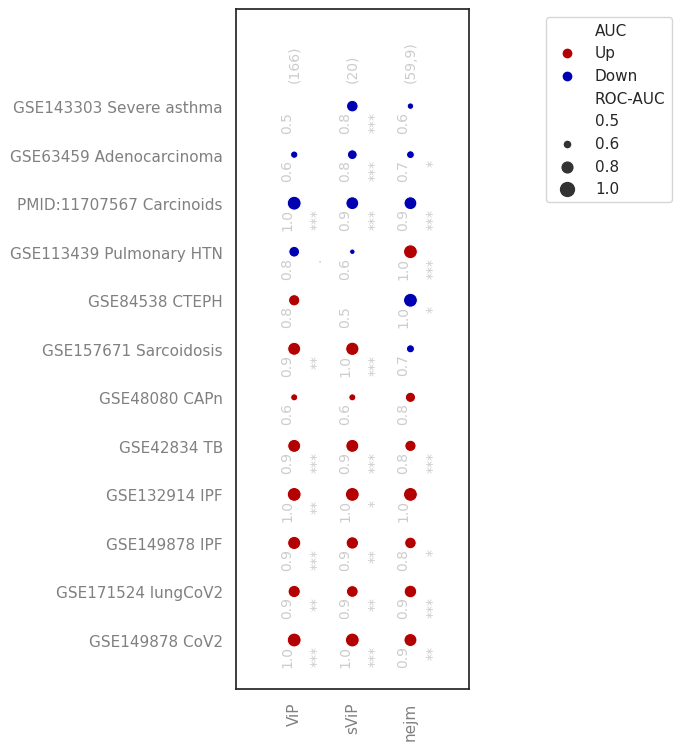

In [6]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #cfile = 'ipf/IPF signature_PMID_28942086.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    #cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','70', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_25029475.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_28484236.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_30998768.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    #wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
    #ax1 = plt.subplot2grid((8, 3), (4, 1))
    #ax2 = plt.subplot2grid((8, 3), (5, 1), rowspan=3)
    #res += [process(ana, 'DATP', wt1, ax1, ax2, id1, l1)]
    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 2) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(3, len(dfs)*0.5+3), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/VIP_SVIP_NEJM.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

ana.getXu2020CoV2(3)
res += [IPFAnalysis(ana, 'CoV2', pdf)]
ana.getMelms2021CoV2snblk()
res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
#ana.getLi2021()
#res += [IPFAnalysis(ana, 'Single_cell lung-cov2')]
ana.getXu2020CoV2(4)
res += [IPFAnalysis(ana, 'IPF', pdf)]
#ana.getYao2020IPF()
ana.getYao2020bulk()
res += [IPFAnalysis(ana, 'IPF', pdf)]
#ana.getGao2020ipf()
#res += [IPFAnalysis(ana, 'IPF_sc_new', pdf)]
#ana.getXu2020CoV2(5)
#res += [IPFAnalysis(ana, 'IPF-CoV2')]
#ana.getBharat2020CoV2scblk(2, 0)
#res += [IPFAnalysis(ana, 'epiCoV2')]
#ana.getNienhold2020(2)
#res += [IPFAnalysis(ana, 'lungCoV2')]

#ana.getSabath2021(0)
#res += [IPFAnalysis(ana, 'N_Hospitalized_COV19')]
#ana.getSabath2021(1)
#res += [IPFAnalysis(ana, 'Hospitalized_COV19')]
#ana.getreichmann2021()
#res += [IPFAnalysis(ana, 'TB_2')]
ana.getBloom2013()
res += [IPFAnalysis(ana, 'TB', pdf)]
ana.getSeverino2014()
res += [IPFAnalysis(ana, 'CAPn', pdf)]
ana.getcasanova2020()
res += [IPFAnalysis(ana, 'Sarcoidosis', pdf)]
ana.getwest2019()
res += [IPFAnalysis(ana, 'CTEPH', pdf)]
ana.getmura2019()
res += [IPFAnalysis(ana, 'Pulmonary HTN', pdf)]
ana.getBhatta2001()
res += [IPFAnalysis(ana, 'Carcinoids', pdf)]
ana.getrobles2015()
res += [IPFAnalysis(ana, 'Adenocarcinoma', pdf)]
ana.getOvanda2021()
res += [IPFAnalysis(ana, 'Severe asthma', pdf)]




df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)








# Fig 2B

Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
12 8 4 0 COV339
[164]
[20]
[58, 8]
[71]
[60]
[46, 17]
[12]
[15, 7]
[4, 11]
Melms 2021 CoV2 snblk (n = 27)
GSE171524 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV376
27 7 20 0 COV376
[158]
[18]
[57, 8]
[69]
[60]
[46, 16]
[12]
[15, 7]
[4, 11]
Bharat 2020 cov scblk (n = 22)
GSE158127 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV342.5
6 3 3 0 COV342.5
[163]
[19]
[57, 8]
[70]
[60]
[46, 16]
[12]
[15, 7]
[4, 11]
Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
13 8 5 0 COV339
[164]
[20]
[58, 8]
[71]
[60]
[46, 17]
[12]
[15, 7]
[4, 11]
Yao 2021 ipf scblk (n = 28)
GSE146981 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV343
28 17 11 0 COV343
[163]
[20]
[57, 8]
[71]
[60]
[46, 17]
[12]
[15, 7]
[4, 11]
Yao 2020 ipf (n = 24)
GSE132914 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV268
6

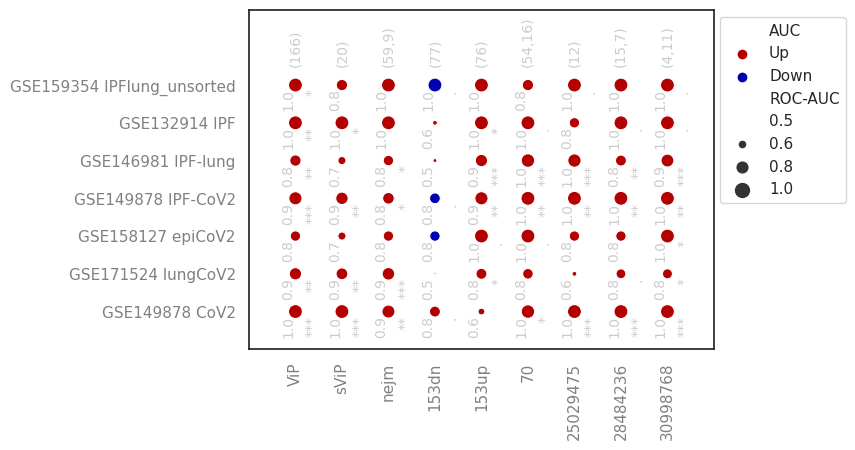

In [4]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    #wt1, l1 = [1], [['IL15', 'IL15RA']]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]    
    
    
    #cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #cfile = 'ipf/IPF signature_PMID_28942086.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','52', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','70', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_25029475.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_28484236.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_30998768.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    
#    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/new_fig_covid/IPF_COVID.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

ana.getXu2020CoV2(3)
res += [IPFAnalysis(ana, 'CoV2', pdf)]


ana.getMelms2021CoV2snblk()
res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
ana.getBharat2020CoV2scblk(2, 0)
res += [IPFAnalysis(ana, 'epiCoV2', pdf)]

ana.getXu2020CoV2(4)
res += [IPFAnalysis(ana, 'IPF-CoV2', pdf)]

ana.getYao2021IPF()
res += [IPFAnalysis(ana, 'IPF-lung', pdf)]
ana.getYao2020bulk()
res += [IPFAnalysis(ana, 'IPF', pdf)]
ana.getGao2020ipf()
res += [IPFAnalysis(ana, 'IPFlung_unsorted', pdf)]






df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


# Fig 2I

Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
12 8 4 0 COV339
[164]
[20]
[58, 8]
Melms 2021 CoV2 snblk (n = 27)
GSE171524 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV376
27 7 20 0 COV376
[158]
[18]
[57, 8]
Byrnes 2009 cfs (n = 88)
GSE16059 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS3
76 44 32 0 SS3
[370]
[38]
[186, 22]
Byrnes 2009 cfs (n = 88)
GSE16059 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS3
56 44 12 0 SS3
[370]
[38]
[186, 22]
Van 2021 GWI (n = 117)
GSE168409 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS7
117 59 58 0 SS7
[162]
[19]
[58, 8]


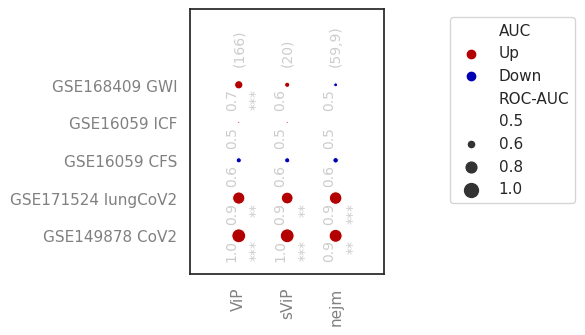

In [49]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #cfile = 'ipf/IPF signature_PMID_28942086.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    #cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','70', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_25029475.txt'
    #wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_28484236.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_30998768.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    #wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
    #ax1 = plt.subplot2grid((8, 3), (4, 1))
    #ax2 = plt.subplot2grid((8, 3), (5, 1), rowspan=3)
    #res += [process(ana, 'DATP', wt1, ax1, ax2, id1, l1)]
    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(2.5, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/CFS.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

ana.getXu2020CoV2(3)
res += [IPFAnalysis(ana, 'CoV2', pdf)]
ana.getMelms2021CoV2snblk()
res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
#ana.getLi2021()
#res += [IPFAnalysis(ana, 'Single_cell lung-cov2')]
#ana.getHerazoMaya2013(0)
#res += [IPFAnalysis(ana, 'IPF', pdf)]
#ana.getXu2020CoV2(5)
#res += [IPFAnalysis(ana, 'IPF-CoV2')]
#ana.getBharat2020CoV2scblk(2, 0)
#res += [IPFAnalysis(ana, 'epiCoV2')]
#ana.getNienhold2020(2)
#res += [IPFAnalysis(ana, 'lungCoV2')]

#ana.getSabath2021(0)
#res += [IPFAnalysis(ana, 'N_Hospitalized_COV19')]
#ana.getSabath2021(1)
#res += [IPFAnalysis(ana, 'Hospitalized_COV19')]
#ana.getreichmann2021()
#res += [IPFAnalysis(ana, 'TB_2')]
ana.getByrnes2009CFS()
res += [IPFAnalysis(ana, 'CFS', pdf)]
#ana.getGow2009()
#res += [IPFAnalysis(ana, 'CFS_PBMC')]
ana.getByrnes2009ICF()
res += [IPFAnalysis(ana, 'ICF', pdf)]
ana.getVan20211()
res += [IPFAnalysis(ana, 'GWI', pdf)]








df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)








# Fig S2

Winkler 2021 CoV2 hACE2 mm (n = 27)
GSE161615 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV374
27 2 25 0 COV374
[128]
[12]
[2]
[6]
[18]
[63]
[48]
[40, 12]
[12]
[15, 7]
[4, 10]
[55, 8]
Chen 2021 mice-COVID (n = 8)
GSE167400 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS12
5 3 2 0 SS12
[127]
[9]
[2]
[6]
[17]
[63]
[47]
[40, 11]
[10]
[15, 7]
[3, 10]
[56, 8]
Chen 2021 mice-COVID (n = 8)
GSE167400 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS12
6 3 3 0 SS12
[127]
[9]
[2]
[6]
[17]
[63]
[47]
[40, 11]
[10]
[15, 7]
[3, 10]
[56, 8]
iNetMed 2020 CoV2 Namir EIDD-8801 (n = 16)
GSE168095 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV323
5 2 3 0 COV323
[101]
[9]
[1]
[5]
[15]
[57]
[38]
[33, 11]
[9]
[13, 5]
[3, 8]
[49, 8]
iNetMed 2020 CoV2 Namir EIDD-8801 (n = 16)
GSE168095 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV323
6 3 3 0 COV323
[101]
[9]
[1]
[5]
[15]
[57]
[38]
[33, 11]
[9]
[13, 5]
[3, 8]
[49, 8]
iNetMed 2020 Ham CoV2

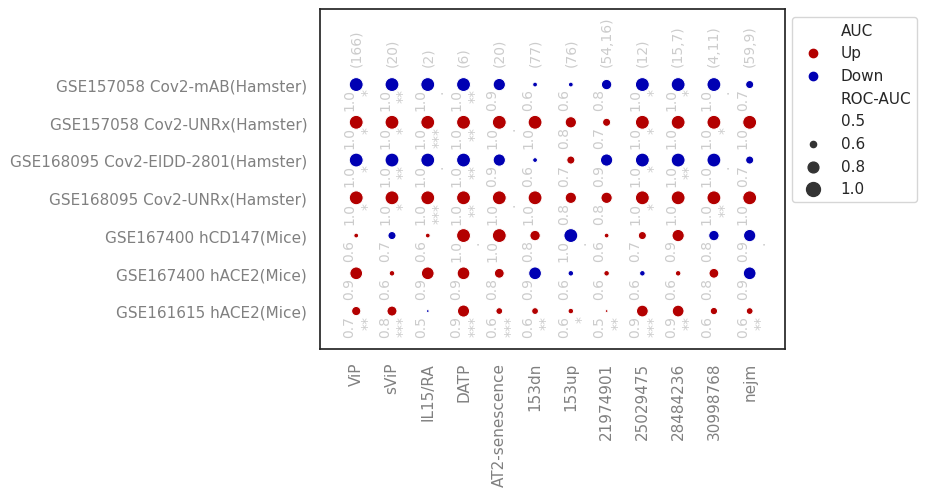

In [5]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [1], [['IL15', 'IL15RA']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15/RA', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    
    cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    cfile = 'ipf/IPF signature_PMID_28942086.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID_32991815-AT2-senescence.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AT2-senescence', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','52', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','21974901', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_25029475.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_28484236.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_30998768.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    

    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/animal_model.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

#ana.getXu2020CoV2(3)
#res += [IPFAnalysis(ana, 'CoV2')]
#ana.getXu2020CoV2(4)
#res += [IPFAnalysis(ana, 'IPF')]
#ana.getXu2020CoV2(5)
#res += [IPFAnalysis(ana, 'IPF-CoV2')]
#ana.getMelms2021CoV2snblk()
#res += [IPFAnalysis(ana, 'lungCoV2')]
#ana.getBharat2020CoV2scblk(2, 0)
#res += [IPFAnalysis(ana, 'epiCoV2')]
#ana.getNienhold2020(2)
#res += [IPFAnalysis(ana, 'lungCoV2')]
ana.getWinkler2021CoV2hACE2mm()
res += [IPFAnalysis(ana, 'hACE2(Mice)', pdf)]
ana.getchen2021ACE2mm()
res += [IPFAnalysis(ana, 'hACE2(Mice)', pdf)]
ana.getchen2021CD147mm()
res += [IPFAnalysis(ana, 'hCD147(Mice)', pdf)]
ana.getPG2020UN()
res += [IPFAnalysis(ana, 'Cov2-UNRx(Hamster)', pdf)]
ana.getPG2020EIDD()
res += [IPFAnalysis(ana, 'Cov2-EIDD-2801(Hamster)', pdf)]
ana.getPG2020LungHam(tn=2)
res += [IPFAnalysis(ana, 'Cov2-UNRx(Hamster)', pdf)]
ana.getPG2020LungHam(tn=3)
res += [IPFAnalysis(ana, 'Cov2-mAB(Hamster)', pdf)]


df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


# Fig S1

Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
13 8 5 0 COV339
[164]
[20]
[58, 8]
[71]
[60]
[46, 17]
[12]
[15, 7]
Yao 2021 ipf scblk (n = 28)
GSE146981 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV343
28 17 11 0 COV343
[163]
[20]
[57, 8]
[71]
[60]
[46, 17]
[12]
[15, 7]
Yao 2020 ipf (n = 24)
GSE132914 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV268
6 3 3 0 COV268
[161]
[20]
[56, 8]
[70]
[60]
[46, 16]
[12]
[15, 7]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
5 2 3 0 COV424
[164]
[19]
[58, 8]
[70]
[60]
[47, 16]
[12]
[15, 7]
Furusawa 2020 (n = 288)
GSE150910 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS39
206 103 103 0 SS39
[153]
[17]
[54, 8]
[66]
[60]
[45, 16]
[12]
[13, 6]
Konigsberg 2021 (n = 37)
GSE173355 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS38
37 14 23 0 SS38
[668]
[31]
[323, 31]
[336]
[278]
[17

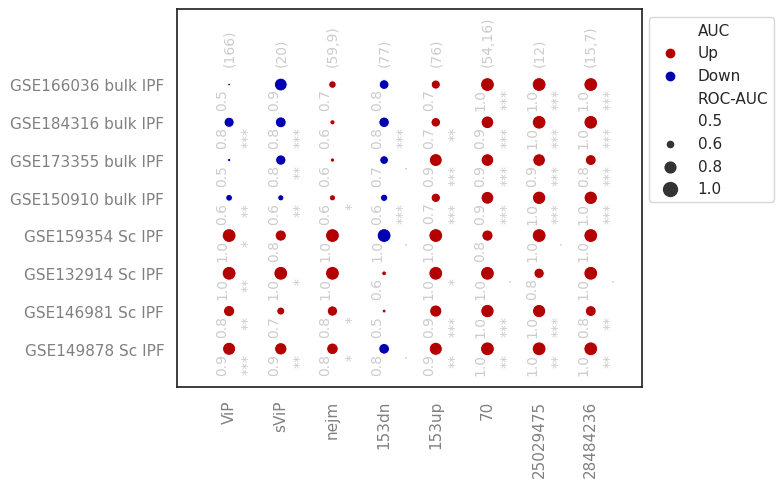

In [8]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
#    wt1, l1 = [1], [['IL15', 'IL15RA']]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]    
    
    
    cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    cfile = 'ipf/IPF signature_PMID_28942086.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','52', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','70', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_25029475.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_PMID_28484236.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
#    cfile = 'ipf/IPF signature_PMID_30998768.txt'
#    l1 = bone.getEntries(cfile, 0)
#    wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]

    
#    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(6, len(dfs)*0.5+1), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/new_fig_covid/bulk_sc.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

#ana.getXu2020CoV2(3)
#res += [IPFAnalysis(ana, 'CoV2', pdf)]

#ana.getXu2020CoV2(5)
#res += [IPFAnalysis(ana, 'IPF-CoV2', pdf)]
#ana.getMelms2021CoV2snblk()
#res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
#ana.getBharat2020CoV2scblk(2, 0)
#res += [IPFAnalysis(ana, 'epiCoV2', pdf)]
#ana.getNienhold2020(2)
#res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
#ana.getLi2021()
#res += [IPFAnalysis(ana, 'Single_cell covid lung', pdf)]
ana.getXu2020CoV2(4)
res += [IPFAnalysis(ana, 'Sc IPF', pdf)]
ana.getYao2021IPF()
res += [IPFAnalysis(ana, 'Sc IPF', pdf)]
ana.getYao2020bulk()
res += [IPFAnalysis(ana, 'Sc IPF', pdf)]
ana.getGao2020ipf()
res += [IPFAnalysis(ana, 'Sc IPF', pdf)]


#ana.getWasnik2021()
#res += [IPFAnalysis(ana, 'IPF_Distal Epithelial Cells', pdf)]


ana.getFurusawa2020()
res += [IPFAnalysis(ana, 'bulk IPF', pdf)]


ana.getKonigsberg2020()
res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getBoesch2020()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getZhu2021()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getDeng2021()
#res += [IPFAnalysis(ana, 'IPF fibroblasts', pdf)]

ana.getDe2021()
res += [IPFAnalysis(ana, 'bulk IPF', pdf)]


ana.getDePianto()
res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getDePianto2()
#res += [IPFAnalysis(ana, 'DePianto_Digest', pdf)]

#ana.getDePianto3()
#res += [IPFAnalysis(ana, 'DePianto_Bronchoalveolar lavage', pdf)]

#ana.getSabath2021(0)
#res += [IPFAnalysis(ana, 'N_Hospitalized_COV19')]
#ana.getSabath2021(1)
#res += [IPFAnalysis(ana, 'Hospitalized_COV19')]
#ana.getreichmann2021()
#res += [IPFAnalysis(ana, 'TB_2')]
#ana.getSeverino2014()
#res += [IPFAnalysis(ana, 'CAPn')]
#ana.getBloom2013()
#res += [IPFAnalysis(ana, 'TB')]
#ana.getmura2019()
#res += [IPFAnalysis(ana, 'Pulmonary HTN')]
#ana.getcasanova2020()
#res += [IPFAnalysis(ana, 'Sarcoidosis')]
#ana.getwest2019()
#res += [IPFAnalysis(ana, 'CTEPH')]
#ana.getBhatta2001()
##res += [IPFAnalysis(ana, 'Carcinoids')]
#ana.getrobles2015()
#res += [IPFAnalysis(ana, 'Adenocarcinoma')]
#ana.getOvanda2021()
#res += [IPFAnalysis(ana, 'Severe asthma')]




df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)


# Fig 4E

Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
5 2 3 0 COV424
[164]
[19]
[58, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[47, 16]
[12]
[15, 7]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
7 3 4 0 COV424
[164]
[19]
[58, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[47, 16]
[12]
[15, 7]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
7 3 4 0 COV424
[164]
[19]
[58, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[47, 16]
[12]
[15, 7]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
2 1 1 0 COV424
[164]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[19]
[58, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[47, 16]
[12]
[15, 7]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
6 3 3 0 COV424
[164]
[19]
[58, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[47, 16]
[12]
[15, 7]


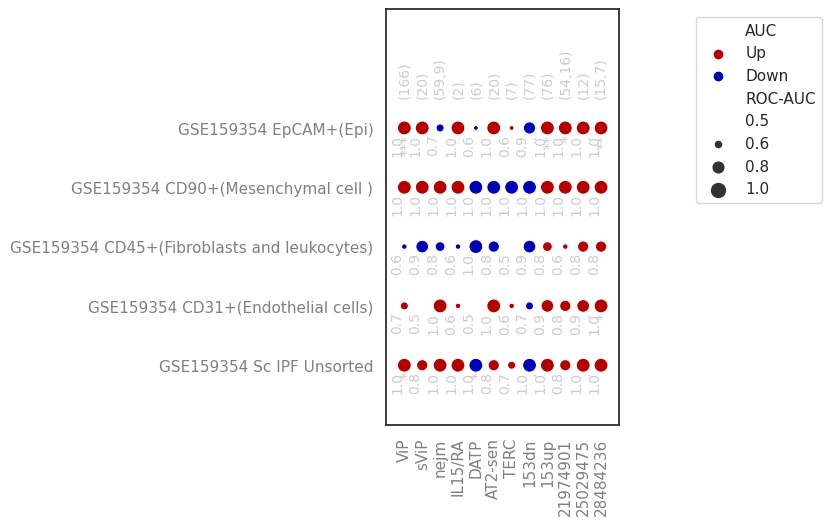

In [ ]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [1], [['IL15', 'IL15RA']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15/RA', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    
    cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    cfile = 'ipf/IPF signature_PMID_28942086.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID_32991815-AT2-senescence.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AT2-sen', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getMSigDB("JU_AGING_TERC_TARGETS_UP")
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','TERC', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','52', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','21974901', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature_PMID_25029475.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature_PMID_28484236.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_30998768.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 2) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(3, len(dfs)*0.5+3), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/new_fig_covid/Sc_type.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []


ana.getGao2020ipf()
res += [IPFAnalysis(ana, 'Sc IPF Unsorted', pdf)]

ana.getGaoCD31()
res += [IPFAnalysis(ana, 'CD31+(Endothelial cells)', pdf)]

ana.getGaoCD45()
res += [IPFAnalysis(ana, 'CD45+(Fibroblasts and leukocytes)', pdf)]

ana.getGaoCD90()
res += [IPFAnalysis(ana, 'CD90+(Mesenchymal cell )', pdf)]

ana.getGaoEPCAM()
res += [IPFAnalysis(ana, 'EpCAM+(Epi)', pdf)]






df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

# Fig 4A

Zhang 2020 cov cbulk (n = 72)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.4
12 3 9 0 COV169.4
[163]
[19]
[57, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[46, 16]
[12]
[15, 7]
Zhang 2020 cov cbulk (n = 72)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.4
12 3 9 0 COV169.4
[163]
[19]
[57, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[46, 16]
[12]
[15, 7]
Zhang 2020 cov cbulk (n = 72)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.4
8 3 5 0 COV169.4
[163]
[19]
[57, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[46, 16]
[12]
[15, 7]
Zhang 2020 cov CD8 T Cell (n = 12)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.6
12 3 9 0 COV169.6
[161]
[19]
[52, 7]
[2]
[6]
[18]
[6]
[66]
[57]
[43, 14]
[8]
[9, 7]
Zhang 2020 cov cbulk (n = 72)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.4
9 1 8 0 COV169.4
[163]
[19]
[57, 8]
[2]
[6]
[19]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[7]
[70]
[60]
[46, 16]
[12]
[15, 7]
Zhang 2020 cov cbulk (n = 72)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.4
12 3 9 0 COV169.4
[163]
[19]
[57, 8]
[2]
[6]
[19]
[7]
[70]
[60]
[46, 16]
[12]
[15, 7]
Zhang 2020 cov epithelial (n = 12)
GSE145926 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV169.5
12 3 9 0 COV169.5
[163]
[19]
[57, 7]
[2]
[6]
[19]
[7]
[70]
[60]
[46, 16]
[11]
[15, 7]


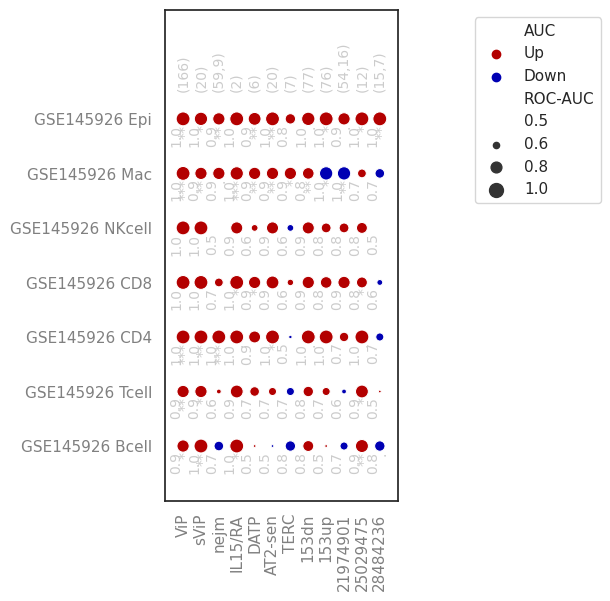

In [5]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [1], [['IL15', 'IL15RA']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15/RA', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    
    cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    cfile = 'ipf/IPF signature_PMID_28942086.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:8], l1[10:]]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID_32991815-AT2-senescence.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AT2-sen', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getMSigDB("JU_AGING_TERC_TARGETS_UP")
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','TERC', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','52', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene DOWN ONLY_PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153dn', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    cfile = 'ipf/IPF signature_Bayesian 153 gene UP ONLY PMID_21974901.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','153up', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature Bayesian 70 gene _PMID_21974901.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:55], l1[58:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','21974901', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature_PMID_25029475.txt'
    wt1, l1 = [1], [bone.getEntries(cfile, 0)[:-1]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','25029475', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    cfile = 'ipf/IPF signature_PMID_28484236.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:16], l1[20:-2]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','28484236', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/IPF signature_PMID_30998768.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[1:5], l1[7:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','30998768', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]

    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 2) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(3, len(dfs)*0.5+3), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/Sc_bubble.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

#ana.getXu2020CoV2(3)
#res += [IPFAnalysis(ana, 'CoV2', pdf)]
#ana.getMelms2021CoV2snblk()
#res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
#ana.getLi2021()
#res += [IPFAnalysis(ana, 'Single_cell lung-cov2', pdf)]
#ana.getXu2020CoV2(4)
#res += [IPFAnalysis(ana, 'IPF', pdf)]
#ana.getYao2020IPF()
#res += [IPFAnalysis(ana, 'IPF', pdf)]
#ana.getXu2020CoV2(5)
#res += [IPFAnalysis(ana, 'IPF-CoV2')]
ana.getZhang2020CB(tn=4, tb=0)
res += [IPFAnalysis(ana, 'Bcell', pdf)]
ana.getZhang2020CB(tn=4, tb=1)
res += [IPFAnalysis(ana, 'Tcell', pdf)]
ana.getZhang2020CB(tn=4, tb=2)
res += [IPFAnalysis(ana, 'CD4', pdf)]
ana.getZhang2020CD8(tn=1)
res += [IPFAnalysis(ana, 'CD8', pdf)]
ana.getZhang2020CB(tn=4, tb=4)
res += [IPFAnalysis(ana, 'NKcell', pdf)]
ana.getZhang2020CB(tn=4, tb=5)
res += [IPFAnalysis(ana, 'Mac', pdf)]
ana.getZhang2020Epi(tn=1)
res += [IPFAnalysis(ana, 'Epi', pdf)]
#'B':0, 'T':1, 'CD4_T':2, 'CD8_T':3, 'Natural_killer':4,
#                'Macs_Monos_DCs':5, 'Epithelial':6
#ana.getSabath2021(0)
#res += [IPFAnalysis(ana, 'N_Hospitalized_COV19')]
#ana.getSabath2021(1)
#res += [IPFAnalysis(ana, 'Hospitalized_COV19')]
#ana.getreichmann2021()
#res += [IPFAnalysis(ana, 'TB_2')]
#ana.getBloom2013()
#res += [IPFAnalysis(ana, 'TB', pdf)]
#ana.getSeverino2014()
#res += [IPFAnalysis(ana, 'CAPn', pdf)]
#ana.getcasanova2020()
#res += [IPFAnalysis(ana, 'Sarcoidosis', pdf)]
#ana.getwest2019()
#res += [IPFAnalysis(ana, 'CTEPH', pdf)]
#ana.getmura2019()
#res += [IPFAnalysis(ana, 'Pulmonary HTN', pdf)]
#ana.getBhatta2001()
#res += [IPFAnalysis(ana, 'Carcinoids', pdf)]
#ana.getrobles2015()
#res += [IPFAnalysis(ana, 'Adenocarcinoma', pdf)]
#ana.getOvanda2021()
#res += [IPFAnalysis(ana, 'Severe asthma', pdf)]




df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)

# Fig 4D

Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
12 8 4 0 COV339
[2]
[164]
[20]
[6]
[19]
Melms 2021 CoV2 snblk (n = 27)
GSE171524 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV376
27 7 20 0 COV376
[2]
[158]
[18]
[7]
[19]
Bharat 2020 cov scblk (n = 22)
GSE158127 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV342.5
6 3 3 0 COV342.5
[2]
[163]
[19]
[7]
[19]
Xu 2020 CoV2 bulk (n = 21)
GSE149878 GSE122960 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV339
13 8 5 0 COV339
[2]
[164]
[20]
[6]
[19]
Yao 2021 ipf scblk (n = 28)
GSE146981 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV343
28 17 11 0 COV343
[2]
[163]
[20]
[6]
[19]
Gao 2020 ipf scblk (n = 48)
GSE159354 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV424
5 2 3 0 COV424
[2]
[164]
[19]
[7]
[19]
Yao 2020 ipf (n = 24)
GSE132914 http://hegemon.ucsd.edu/Tools/explore.php?key=covid&id=COV268
6 3 3 0 COV268
[2]
[161]
[20]
[6]
[19

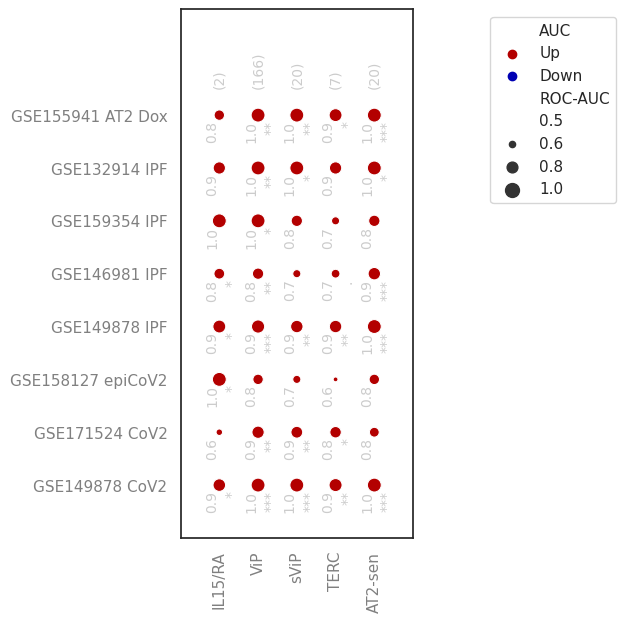

In [9]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []

    wt1, l1 = [1], [['IL15', 'IL15RA']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15/RA', getL(l1)]      
    res += [ana.getStats(l1, wt1, ann)]

    wt1, l1 = bone.getViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    wt1, l1 = bone.getSViP()
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','sViP', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    #cfile = 'ipf/nejm COVID VS H1N1 LUNG_PMID 32437596.txt'
    #l1 = bone.getEntries(cfile, 0)
    #wt1, l1 = [1, -1], [l1[3:62], l1[65:]]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','nejm', getL(l1)]
    #res += [ana.getStats(l1, wt1, ann)]
    

    #res += [ana.getStats(l1, wt1, ann)]
    #wt1, l1 = [1], [['IL15', 'IL15RA']]
    #ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','IL15/RA', getL(l1)]    
    
#    cfile = 'ipf/IPF 15-gene signature UP in IPF.txt'
#    wt1, l1 = [1], [bone.getEntries(cfile, 0)]
#    cfile = 'ipf/IPF signature_PMID_28942086.txt'
#    l1 = bone.getEntries(cfile, 0)
#    wt1, l1 = [1, -1], [l1[1:8], l1[10:]]

#    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID32750316-datp.txt", 0)]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','DATP', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]

    wt1, l1 = bone.getMSigDB("JU_AGING_TERC_TARGETS_UP")
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','TERC', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
    
    wt1, l1 = [1], [bone.getEntries("/Users/sinha7290/public_html/BoNE/PMID_32991815-AT2-senescence.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','AT2-sen', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]

    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 2) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(3, len(dfs)*0.5+3), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/4D.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []








ana.getXu2020CoV2(3)
res += [IPFAnalysis(ana, 'CoV2', pdf)]
ana.getMelms2021CoV2snblk()
res += [IPFAnalysis(ana, 'CoV2', pdf)]
ana.getBharat2020CoV2scblk(2, 0)
res += [IPFAnalysis(ana, 'epiCoV2', pdf)]
ana.getXu2020CoV2(4)
res += [IPFAnalysis(ana, 'IPF', pdf)]

#ana.getMelms2021CoV2snblk()
#res += [IPFAnalysis(ana, 'lungCoV2', pdf)]
ana.getYao2021IPF()
res += [IPFAnalysis(ana, 'IPF', pdf)]

ana.getGao2020ipf()
res += [IPFAnalysis(ana, 'IPF', pdf)]

ana.getYao2020bulk()
res += [IPFAnalysis(ana, 'IPF', pdf)]

ana.getSullivan2021a549()
res += [IPFAnalysis(ana, 'AT2 Dox', pdf)]
#ana.getWasnik2021()
#res += [IPFAnalysis(ana, 'IPF_Distal Epithelial Cells', pdf)]


#ana.getFurusawa2020()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]


#ana.getKonigsberg2020()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getBoesch2020()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getZhu2021()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]

#ana.getDeng2021()
#res += [IPFAnalysis(ana, 'IPF fibroblasts', pdf)]

#ana.getDe2021()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]


#ana.getDePianto()
#res += [IPFAnalysis(ana, 'bulk IPF', pdf)]




df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)